In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx
from pyvis.network import Network

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

In [ ]:
'''
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.DataFrame({'number':['123','234','345'],'contactnumber':['234','345','123'],'callduration':[1,2,4]})

df

G = nx.from_pandas_edgelist(df,'number','contactnumber', edge_attr='callduration')
durations = [i['callduration'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True)
nx.draw_networkx_edges(G, pos, width=durations, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)
'''


In [3]:
with open("../참고 데이터/csv/한국행정구역분류_행정동코드(서울).csv",
          encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류','읍면동']]
newdata

with open("../참고 데이터/csv/large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
#data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

# tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}
#tst = {11010:"ㅁㄴㅇㄹ"}
print(tst)

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data)

print(data['이동인구(합)'].size)

## ok!



{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
224     202209  일     0       종로구        중구  F   0   EE          198   28.13
225     202209  일     0       종로구        중구  F  10   EE           22    5.98
226     202209  일     0       종로구        중구  F  15   EH           97   15.78
227     202209  일     0       종로구        중구  F  15   EE           48   22.29
228     202209  일     0       종로구        중구  F  15   HE           45    3.96
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
792718  202209  토     0       강동구       송파구  M  70   EW           41   13.91
792719  202209  토     0       강

In [5]:
plt.barh(data['이동유형'],data['도착 시군구 코드'])
plt.show()
# 안돼 이럼 더 오래 걸린다아

KeyboardInterrupt: 

### 계획

도착 시군구 코드
금천구      573870
종로구      676074
양천구      717838
용산구      739093
도봉구      745691
성동구      751519
중구       755032
구로구      784906
서대문구     800930
중랑구      811859
강북구      811980
동대문구     831928
광진구      832544
동작구      836118
은평구      841488
서초구      853217
영등포구     884461
강동구      893260
성북구      901851
강서구      936447
노원구      943468
관악구      954664
마포구      959790
송파구     1012979
강남구     1019066
Name: 평균 이동 시간(분), dtype: int64


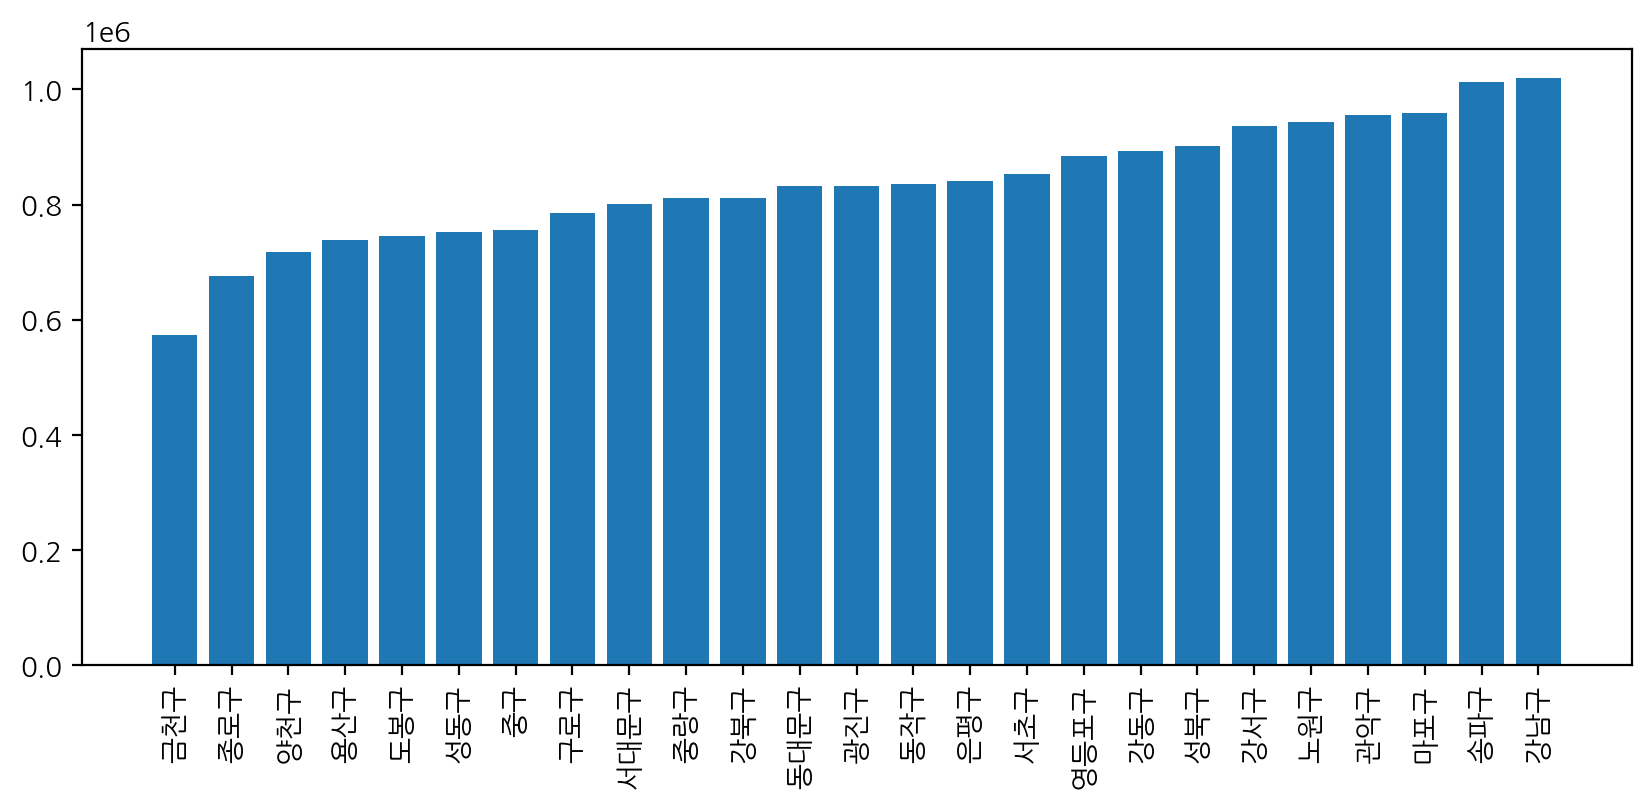

In [59]:
## 진짜 탑텐만 뽑은거 여기다 하고 막대기로 만들자
# 으으 머리야 능률교과서

# 1. data head 10 기준을 하되, 같은 출발시군구는 다 합쳐서..
# 2. 어어.. 출발 도착을 어떻게 할까 고민해보자
# 4. 
# df2 = df.groupby(['address']).sum() 이런걸 쓰보자

data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)
data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
# print(list(data2))
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']  
plt.figure(figsize=(10,4))
plt.bar(regions, data2point5)
plt.xticks(range(25), regions, rotation=90)
plt.show()

# 헬프 미!!!!

```
혹시 월별 
(출발 - 도착)이나 
(도착) 
유동인구 많은 자치구 그래프와 top 10까지 
내일까지 그리고, 분석해 줄 수 있어?
```
bar, 출발-도착이 루프가 있는거 제외하고
중복을 지우면 곤란하다 중복된거까지 '이동인구(합)' 을 각각 합계에 넣어야 한다



그 서울 이외의 코드가 정확하지 않으면 싹뭉탱이로 '외부'라고 하자





```
(출발-도착)이 너무 많으면

자치구별 총 도착 인구 그래프그리고 분석해도 좋을거같네
```

일단 해보고 나면 
성별	나이 도 어떻게 활용해볼까 ㄱㄱ

In [ ]:
graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

#for node in graph:

import random


an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
edge_labels = nx.get_edge_attributes(graph, "이동인구(합)")
nx.draw(graph,
        with_labels=True,
        node_color=color,
        node_size=7,
        arrows=False,
        width=0.1,
        font_family='NanumGothic',
        pos=nx.spring_layout(graph))

plt.title("ㅁㄴㅇㄹ")
plt.axis('off')
plt.show()

# 그래프 html 출력
# nt = Network(height='1080px', width='80%',)


# nt.from_nx(graph)
# nt.toggle_physics(False)
# nt.show_buttons(filter_=['physics'])
# nt.show('../results/res1.html')


# 이 파일에서는 어떤 곳이 유동인구가 많은지 그랲 그리지 말고 텍스트로 판별을 내볼 생각에요.